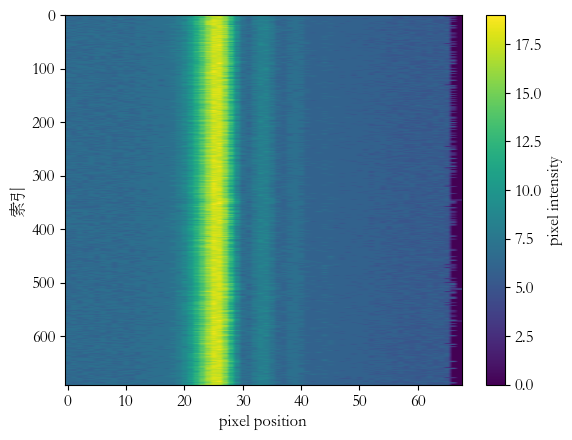

In [1]:
import os
import numpy as np
from PIL import Image
from scipy.ndimage import center_of_mass
import matplotlib.pyplot as plt

# 配置路径参数
folder_path = "D:\\bead image\\2pN_bead images\\2pN-bead-image\\2pN-bead-image"
output_path = "c:\\Users\\PC\\Desktop\\final year project\\结果矩阵.png"

# 获取符合条件的文件列表
all_files = [f for f in os.listdir(folder_path) if "-0_" in f and f.endswith(".png")]
selected_files = sorted(all_files)[:len(all_files)]   #全部选取   

# 初始化存储矩阵
max_length = 0
row_data = []

for filename in selected_files:
    # 原始图像处理
    img_path = os.path.join(folder_path, filename)
    original_img = Image.open(img_path).convert("L")
    img_array = np.array(original_img)
    
    # 质心检测（使用过滤后的图像）
    threshold = np.mean(img_array) + np.std(img_array)
    mask_array = np.where(img_array < threshold, 0, img_array)
    cy, cx = map(int, center_of_mass(mask_array))
    
    # 提取原图右侧像素（确保不越界）
    cx = min(cx, img_array.shape[1]-1)
    right_pixels = img_array[cy, cx:]  # 使用原图数据
    
    # 记录最大长度并存储
    max_length = max(max_length, len(right_pixels))
    row_data.append(right_pixels)

# 构建填充矩阵
matrix = np.zeros((len(row_data), max_length))
for i, pixels in enumerate(row_data):
    matrix[i, :len(pixels)] = pixels
    
# 保存结果图像
result_img = Image.fromarray(matrix.astype(np.uint8))
result_img.save(output_path)

# 可视化显示
plt.imshow(matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='pixel intensity')
plt.xlabel('pixel position')
plt.ylabel('索引')
plt.show()